In [1]:
import pandas as pd

In [2]:
!ls -l

total 13304
-rw-r--r-- 1 juelb 197609   12814 Dec 21  2019 Boston Housing Price.ipynb
-rw-r--r-- 1 juelb 197609  194323 Aug 31  2018 Classified Data
-rw-r--r-- 1 juelb 197609  171584 Mar 16  2020 cnn.ipynb
-rw-r--r-- 1 juelb 197609     426 Dec 18  2019 data_in.csv
-rw-r--r-- 1 juelb 197609  293974 Aug 13 11:48 DIABETES.ipynb
-rw-r--r-- 1 juelb 197609      46 Aug 31  2018 example
-rw-r--r-- 1 juelb 197609    5508 Aug 31  2018 Excel_Sample.xlsx
-rw-r--r-- 1 juelb 197609    5541 Dec 17  2019 Excel_Sample2.xlsx
-rw-r--r-- 1 juelb 197609   24050 Mar 16  2020 gpu.ipynb
-rw-r--r-- 1 juelb 197609    1613 Mar 17  2020 iris
-rw-r--r-- 1 juelb 197609   15268 May 14  2020 Learning_KNN.ipynb
-rw-r--r-- 1 juelb 197609  219983 Dec 20  2019 Learning_Matplotlib.ipynb
-rw-r--r-- 1 juelb 197609  102996 Dec 17  2019 Learning_Pandas.ipynb
-rw-r--r-- 1 juelb 197609   52652 Dec 17  2019 Learning_Pandas_1.ipynb
-rw-r--r-- 1 juelb 197609   30578 Dec 17  2019 Learning_Pandas2.ipynb
-rw-r--r-- 1 juelb 197609  80

In [3]:
wine = pd.read_csv('winequality-red.csv', delimiter=';')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
wine.shape

(1599, 12)

In [5]:
pd.Categorical(wine['quality'])

[5, 5, 5, 6, 5, ..., 5, 6, 6, 5, 6]
Length: 1599
Categories (6, int64): [3, 4, 5, 6, 7, 8]

In [6]:
wine_corr = wine.corr()

In [7]:
wine_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1), wine['quality'], test_size=0.30, random_state=355)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
tree_clf.predict(X_test)

array([5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 7, 7, 7, 6, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 5, 7, 7, 6, 5, 6,
       7, 6, 6, 6, 6, 6, 4, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6,
       8, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 4, 7, 5, 5, 6, 5, 5, 5, 4,
       5, 5, 7, 7, 6, 7, 6, 7, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 7,
       6, 5, 5, 5, 5, 6, 5, 7, 4, 6, 5, 6, 6, 5, 7, 7, 5, 7, 6, 6, 6, 7,
       5, 5, 7, 6, 5, 7, 6, 5, 5, 7, 7, 6, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6,
       7, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 7, 6, 8, 7, 4, 6,
       6, 7, 5, 7, 7, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       7, 4, 6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 7, 8, 7, 5, 5, 6, 6, 7, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 8, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 7, 6, 4, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 5, 7, 5, 6, 6,
       6, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7,

In [15]:
from sklearn.tree import export_graphviz
import graphviz

In [16]:
feature_names = wine.columns[:-1]
class_names = list(map(str, pd.Categorical(wine['quality']).categories))
class_names

['3', '4', '5', '6', '7', '8']

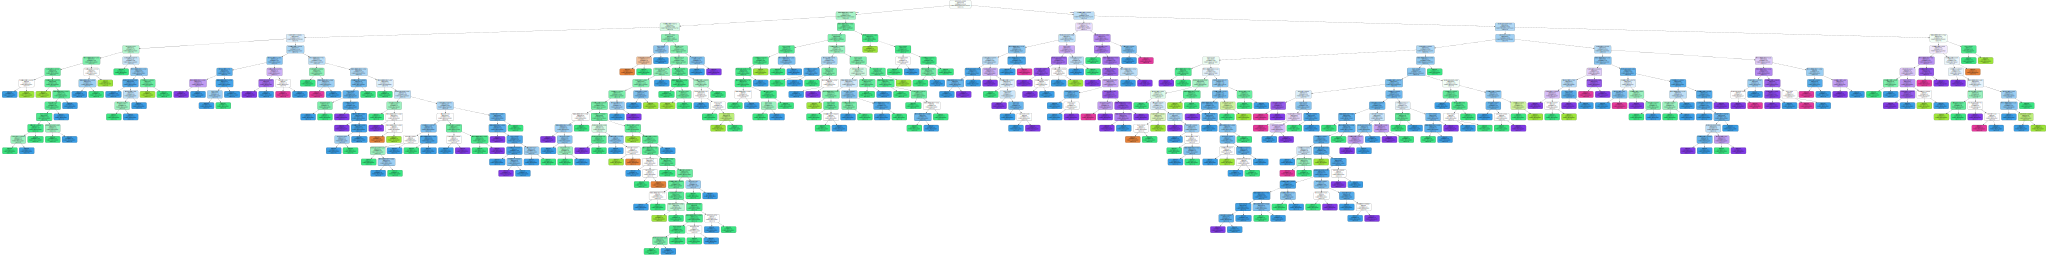

In [17]:
dot_data = export_graphviz(tree_clf,feature_names=feature_names, class_names=class_names,rounded=True, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [18]:
import pydotplus
from IPython.display import Image 

In [19]:
dot_data = export_graphviz(tree_clf,feature_names=feature_names,rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('my_tree.png')

True

In [20]:
Image(graph.create_png())

In [21]:
tree_clf.score(X_train, y_train)

1.0

In [22]:
tree_clf.score(X_test, y_test)

0.6354166666666666

In [23]:
DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,32,1),
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'splitter' : ['best', 'random']
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv = 5, n_jobs = - 1)

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=4,
                       splitter='random')

In [28]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

In [29]:
grid_search.best_score_

0.606798526585522

In [30]:
new_tree_clf = grid_search.best_estimator_
new_tree_clf

DecisionTreeClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=4,
                       splitter='random')

In [31]:
new_tree_clf.predict(X_test)

array([5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6, 7, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 6, 4, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 7, 5, 5,
       5, 6, 5, 5, 4, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 5, 5, 6, 5, 5, 6,
       6, 5, 7, 5, 5, 7, 5, 5, 5, 7, 5, 6, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5,
       7, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 7, 5, 6, 7, 7, 7, 5,
       7, 5, 5, 7, 6, 5, 6, 5, 7, 7, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 5, 5, 7, 6, 6, 6, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 7,

In [32]:
new_tree_clf.score(X_test, y_test)

0.53125

In [33]:
import joblib

In [34]:
joblib.dump(new_tree_clf, 'new_tree.pkl')

['new_tree.pkl']